In [6]:
!source brt/bin/activate

In [1]:
import torch
from transformers import BertTokenizer, BertModel

# OPTIONAL: if you want to have more information on what's happening, activate the logger as follows
import logging
logging.basicConfig(level=logging.INFO)

import matplotlib.pyplot as plt
#%matplotlib inline

# Load pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [2]:
#tokenization
text = "Here is the sentence I want embeddings for."
marked_text = "[CLS] " + text + " [SEP]"#+ text + " [SEP]"

# Tokenize our sentence with the BERT tokenizer.
tokenized_text = tokenizer.tokenize(marked_text)

# Print out the tokens.
print (tokenized_text)

['[CLS]', 'here', 'is', 'the', 'sentence', 'i', 'want', 'em', '##bed', '##ding', '##s', 'for', '.', '[SEP]']


In [3]:
list(tokenizer.vocab.keys())[5000:5220]

['knight',
 'lap',
 'survey',
 'ma',
 '##ow',
 'noise',
 'billy',
 '##ium',
 'shooting',
 'guide',
 'bedroom',
 'priest',
 'resistance',
 'motor',
 'homes',
 'sounded',
 'giant',
 '##mer',
 '150',
 'scenes',
 'equal',
 'comic',
 'patients',
 'hidden',
 'solid',
 'actual',
 'bringing',
 'afternoon',
 'touched',
 'funds',
 'wedding',
 'consisted',
 'marie',
 'canal',
 'sr',
 'kim',
 'treaty',
 'turkish',
 'recognition',
 'residence',
 'cathedral',
 'broad',
 'knees',
 'incident',
 'shaped',
 'fired',
 'norwegian',
 'handle',
 'cheek',
 'contest',
 'represent',
 '##pe',
 'representing',
 'beauty',
 '##sen',
 'birds',
 'advantage',
 'emergency',
 'wrapped',
 'drawing',
 'notice',
 'pink',
 'broadcasting',
 '##ong',
 'somehow',
 'bachelor',
 'seventh',
 'collected',
 'registered',
 'establishment',
 'alan',
 'assumed',
 'chemical',
 'personnel',
 'roger',
 'retirement',
 'jeff',
 'portuguese',
 'wore',
 'tied',
 'device',
 'threat',
 'progress',
 'advance',
 '##ised',
 'banks',
 'hired',
 '

In [4]:
text = "problème central fausse démocratie gouvernement coalition proportionnelle juré."

# Add the special tokens.
marked_text = "[CLS] " + text + " [SEP]"

# Split the sentence into tokens.
tokenized_text = tokenizer.tokenize(marked_text)

# Map the token strings to their vocabulary indeces.
indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)

# Display the words with their indeces.
for tup in zip(tokenized_text, indexed_tokens):
    print('{:<12} {:>6,}'.format(tup[0], tup[1]))

[CLS]           101
problem       3,291
##e           2,063
central       2,430
fa            6,904
##uss        17,854
##e           2,063
democrat      7,672
##ie          2,666
go            2,175
##uve        22,909
##rne        12,119
##ment        3,672
coalition     6,056
proportion   10,817
##nell        9,091
##e           2,063
ju           18,414
##re          2,890
.             1,012
[SEP]           102


In [5]:
segments_ids = [1] * len(tokenized_text)

print (segments_ids)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [6]:
tokens_tensor = torch.tensor([indexed_tokens])
segments_tensors = torch.tensor([segments_ids])

In [7]:
model = BertModel.from_pretrained('bert-base-uncased',output_hidden_states = True, # Whether the model returns all hidden-states.
                                  )
# Put the model in "evaluation" mode, meaning feed-forward operation.
model.eval()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          

In [8]:
with torch.no_grad():

    outputs = model(tokens_tensor, segments_tensors)

    # Evaluating the model will return a different number of objects based on 
    # how it's  configured in the `from_pretrained` call earlier. In this case, 
    # becase we set `output_hidden_states = True`, the third item will be the 
# hidden states from all layers. See the documentation for more details:
    # https://huggingface.co/transformers/model_doc/bert.html#bertmodel
    hidden_states = outputs[2]

In [9]:
bert_model = BertModel.from_pretrained('bert-base-uncased')
bert_model = bert_model.cuda()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [21]:
import nltk

Exception ignored in: <function tqdm.__del__ at 0x7f9e365a28c0>
Traceback (most recent call last):
  File "/home/bruce/.local/lib/python3.10/site-packages/tqdm/std.py", line 1162, in __del__
    self.close()
  File "/home/bruce/.local/lib/python3.10/site-packages/tqdm/notebook.py", line 288, in close
    self.disp(bar_style='danger', check_delay=False)
  File "/home/bruce/.local/lib/python3.10/site-packages/tqdm/notebook.py", line 160, in display
    d = self.format_dict
  File "/home/bruce/.local/lib/python3.10/site-packages/tqdm/std.py", line 1476, in format_dict
    'colour': self.colour}
  File "/home/bruce/.local/lib/python3.10/site-packages/tqdm/notebook.py", line 204, in colour
    return self.container.children[-2].style.bar_color
AttributeError: 'FloatProgress' object has no attribute 'style'
Exception ignored in: <function tqdm.__del__ at 0x7f9e365a28c0>
Traceback (most recent call last):
  File "/home/bruce/.local/lib/python3.10/site-packages/tqdm/std.py", line 1162, in __de

In [10]:
print ("Number of layers:", len(hidden_states), "  (initial embeddings + 12 BERT layers)")
layer_i = 0

print ("Number of batches:", len(hidden_states[layer_i]))
batch_i = 0

print ("Number of tokens:", len(hidden_states[layer_i][batch_i]))
token_i = 0

print ("Number of hidden units:", len(hidden_states[layer_i][batch_i][token_i]))

Number of layers: 13   (initial embeddings + 12 BERT layers)
Number of batches: 1
Number of tokens: 21
Number of hidden units: 768


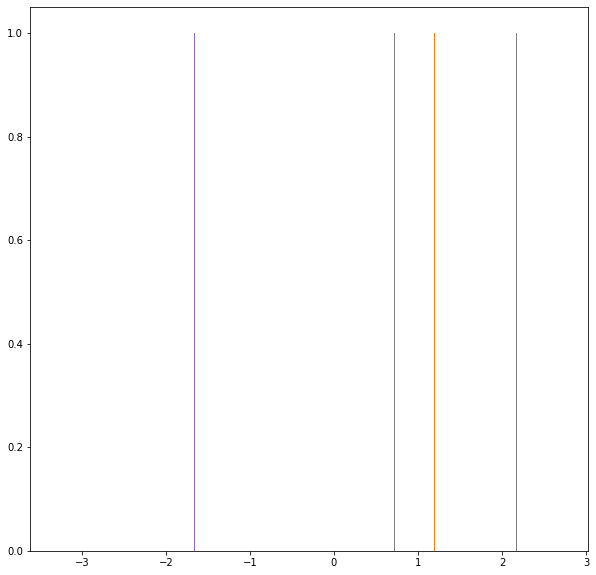

In [11]:
# For the 5th token in our sentence, select its feature values from layer 5.
token_i = 5
layer_i = 5
vec = hidden_states[layer_i][batch_i][token_i]

# Plot the values as a histogram to show their distribution.
plt.figure(figsize=(10,10))
plt.hist(vec, bins=200)
plt.show()

In [13]:
import pandas as pd

In [14]:
train_data = pd.read_csv("/home/bruce/EP-M1/ML-DL/Project/train.csv")

In [15]:
train_data.head(10)

,text,retweets_count,favorites_count,followers_count,statuses_count,friends_count,mentions,urls,verified,hashtags,timestamp,TweetID
0,rt refarcir macron ans nom prépare,3,0,3682,453535,3628,[],[],0,[],1646978048000,832509
1,populaire,0,0,86,1016,284,[],[],0,[],1647694288000,1388011
2,faut dégager cinglé,3,1,1944,28234,1995,[],[],0,[],1647370048000,63896
3,enseignants mettre prescriptions président rép...,0,0,1,1072,0,[],['https://t.co/rytlted08g'],0,[],1647256282000,979251
4,mafieuse oppressive macron,0,0,13957,25311,10841,[],[],0,[],1647258374000,1040049
5,équipe campagne macron prie soutien sarko biza...,2,0,1081,83861,2631,[],['https://t.co/jcafxdwm0w'],0,[],1647454833000,98478
6,envoies macron chameau cheval dessiné commission,3,0,499,3713,998,[],['https://t.co/xhi5dwpvhb'],0,[],1647436595000,20907
7,emmanuel macron annule venue soirée électorale...,1,0,86937,119219,750,[],['https://t.co/pzjwqwm83o'],1,[],1647520208000,571044
8,violer pauvre ukrainienne abusée africains düs...,0,0,95,2397,178,[],[],0,[],1647366716000,312667
9,petites minutes temps temps bfm heures offre m...,2,14,2,239,46,[],['https://t.co/knuch3htt9'],0,[],1647164428000,789217


In [16]:
train_data['text'][20.0]

'vote définition secret con cons brassens etonnant cacher date dernière coloscopie flou loup'